<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [10]:
industry_counts = df['Industry'].value_counts()
industry_counts

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

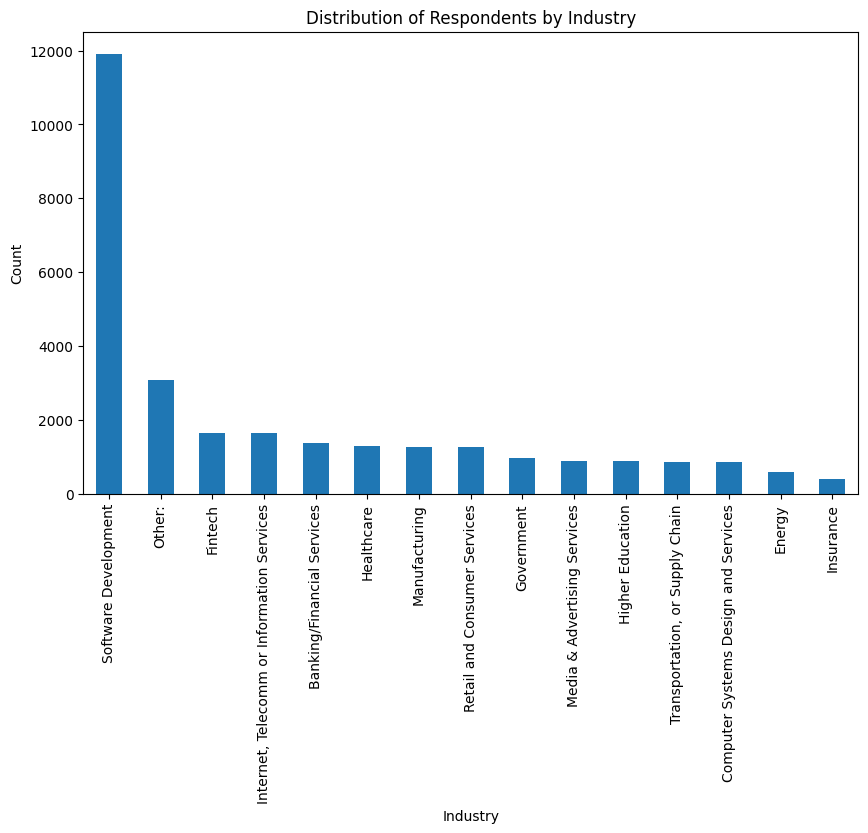

In [12]:
plt.figure(figsize=(10,6))
industry_counts.plot(kind='bar')
plt.title("Distribution of Respondents by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [20]:
std = df['ConvertedCompYearly'].std()
std

186756.97308629757

In [21]:
median = df['ConvertedCompYearly'].median()
median

65000.0

In [22]:
mean = df['ConvertedCompYearly'].mean()
mean

86155.28726264134

In [23]:
treshold = mean + 3 * std
treshold

646426.2065215341

In [24]:
high_outlier = df[df['ConvertedCompYearly'] > treshold]
high_outlier

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,On the job training;Other online resources (e....,Books;Written Tutorials;Interactive tutorial;V...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,NaN,1000000.0,10.0
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,1300000.0,NaN
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,...,20.0,0.0,20.0,0.0,0.0,10.0,Appropriate in length,Easy,800000.0,10.0
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [28]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q2 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q2 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

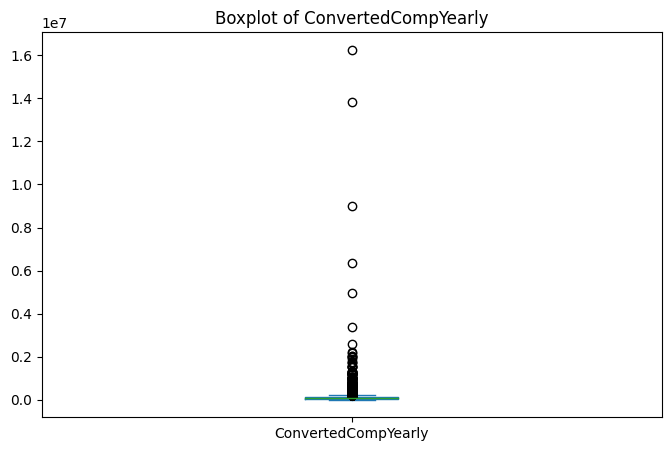

In [25]:
plt.figure(figsize=(8,5))
df['ConvertedCompYearly'].plot(kind='box')
plt.title("Boxplot of ConvertedCompYearly")
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [ ]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]
df_no_outliers

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,AgeNum
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,18.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,25.0
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,35.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,35.0
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,41180,I am a developer by profession,25-34 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Stack Overflow;Coding ...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN,25.0
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN,25.0
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0,45.0
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN,35.0


In [51]:
##Write your code here
print(len(df))
print(len(df_no_outliers))

##     IQR ni daftarga yozish kerak ^




65437
22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [52]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [53]:
def age_to_num(x):
    if x == "Prefer not to say":
        return None
    if x == "Under 18 years old":
        return 17
    if x == "65 years or older":
        return 65
    if x == "55-64 years old":
        return 55
    if x == "45-54 years old":
        return 45
    if x == "35-44 years old":
        return 35
    if x == "25-34 years old":
        return 25
    if x == "18-24 years old":
        return 18


df['AgeNum'] = df['Age'].apply(age_to_num)
df['AgeNum'].value_counts()

AgeNum
25.0    23911
35.0    14942
18.0    14098
45.0     6249
55.0     2575
17.0     2568
65.0      772
Name: count, dtype: int64

In [58]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,AgeNum
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000,65115.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041,29.043615
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259,10.615029
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,17.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000,18.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000,25.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000,35.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000,65.000000


In [64]:
numeric_cols = df[['AgeNum', 'ConvertedCompYearly', 'CompTotal', 'JobSat', 'JobSatPoints_9']].dropna()
numeric_cols

,AgeNum,ConvertedCompYearly,CompTotal,JobSat,JobSatPoints_9
72,18.0,7322.0,2040000.0,10.0,100.0
379,35.0,91295.0,85000.0,10.0,0.0
389,25.0,110000.0,110000.0,10.0,20.0
392,35.0,161044.0,126420.0,7.0,0.0
398,45.0,195000.0,195000.0,5.0,0.0
...,...,...,...,...,...
41175,18.0,15637.0,360000.0,6.0,15.0
41178,18.0,9711.0,240800.0,0.0,0.0
41184,45.0,170000.0,170000.0,9.0,15.0
41186,18.0,12000.0,12000.0,3.0,5.0


In [65]:
corr_matrix = numeric_cols.corr()
corr_matrix

,AgeNum,ConvertedCompYearly,CompTotal,JobSat,JobSatPoints_9
AgeNum,1.000000,0.132708,-0.012992,0.071497,-0.088639
ConvertedCompYearly,0.132708,1.000000,0.064158,0.048618,-0.016527
CompTotal,-0.012992,0.064158,1.000000,0.008374,0.002799
JobSat,0.071497,0.048618,0.008374,1.000000,0.043854
JobSatPoints_9,-0.088639,-0.016527,0.002799,0.043854,1.000000


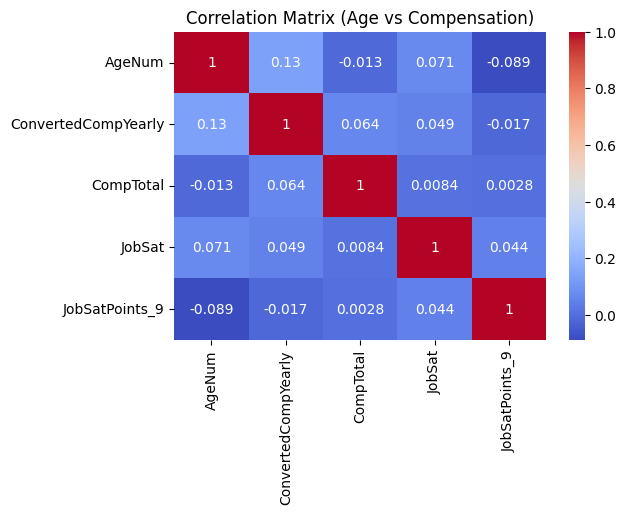

In [66]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Age vs Compensation)")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
